In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import csv

In [ ]:
request = requests.get('https://www.imdb.com/chart/top/?sort=rk,asc&mode=simple&page=1',headers = {'User-Agent': 'Mozilla/5.0'})
response = request.content
soup = BeautifulSoup(response, 'html.parser')

In [ ]:
soup.find('title').text  # Website title

'IMDb Top 250 Movies'

In [ ]:
movie_data = soup.find_all('li',attrs={'class': "ipc-metadata-list-summary-item sc-3f724978-0 enKyEL cli-parent"})

file = 'movie data.csv'
with open(file, mode='w', encoding='utf-8-sig', newline='') as data:
    header = ['Name', 'Year','Rank', 'Rating', 'Total ratings']
    writer = csv.writer(data)
    writer.writerow(header)


    for i in movie_data:
        name = i.find('div', class_="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-43986a27-9 gaoUku cli-title").a.text.split('.')[1]
        rank = i.find('div', class_="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-43986a27-9 gaoUku cli-title").a.text.split('.')[0]
        year = i.find('span', class_='sc-43986a27-8 jHYIIK cli-title-metadata-item').text
        rate = i.find('div', class_='sc-e3e7b191-0 jlKVfJ sc-43986a27-2 bvCMEK cli-ratings-container').span.text.split()[0]
        total_rate = i.find('div', class_='sc-e3e7b191-0 jlKVfJ sc-43986a27-2 bvCMEK cli-ratings-container').span.text.split()[1][1:-1]
        writer.writerow([name, year,rank, rate, total_rate])

print("Data has been written to the CSV file:", data)

Data has been written to the CSV file: <_io.TextIOWrapper name='movie data.csv' mode='w' encoding='utf-8-sig'>


In [ ]:
data = pd.read_csv('movie data.csv')

data.head(15)  # Displaying First 15 rows

,Name,Year,Rank,Rating,Total ratings
0,The Shawshank Redemption,1994,1,9.3,2.8M
1,The Godfather,1972,2,9.2,2M
2,The Dark Knight,2008,3,9.0,2.8M
3,The Godfather Part II,1974,4,9.0,1.3M
4,12 Angry Men,1957,5,9.0,845K
5,Schindler's List,1993,6,9.0,1.4M
6,The Lord of the Rings: The Return of the King,2003,7,9.0,1.9M
7,Pulp Fiction,1994,8,8.9,2.2M
8,The Lord of the Rings: The Fellowship of the ...,2001,9,8.9,2M
9,"The Good, the Bad and the Ugly",1966,10,8.8,798K


Converting 'Total ratings' columns into integer type by eliminating that M(million) and K(thousand) symbol.

In [ ]:
data['Total ratings'] = data['Total ratings'].apply(lambda a:float(a[:-1])*1000000 if (a[-1]=='M') else float(a[:-1])*1000).astype(int)

In [ ]:
data.head(15)  # Displaying First 15 rows

,Name,Year,Rank,Rating,Total ratings
0,The Shawshank Redemption,1994,1,9.3,2800000
1,The Godfather,1972,2,9.2,2000000
2,The Dark Knight,2008,3,9.0,2800000
3,The Godfather Part II,1974,4,9.0,1300000
4,12 Angry Men,1957,5,9.0,845000
5,Schindler's List,1993,6,9.0,1400000
6,The Lord of the Rings: The Return of the King,2003,7,9.0,1900000
7,Pulp Fiction,1994,8,8.9,2200000
8,The Lord of the Rings: The Fellowship of the ...,2001,9,8.9,2000000
9,"The Good, the Bad and the Ugly",1966,10,8.8,798000


In [ ]:
print(data.shape)

(250, 5)


In [ ]:
data.describe()

,Year,Rank,Rating,Total ratings
count,250.000000,250.000000,250.000000,2.500000e+02
mean,1986.716000,125.500000,8.305200,6.809760e+05
std,25.324785,72.312977,0.232355,5.463500e+05
min,1921.000000,1.000000,8.000000,3.700000e+04
25%,1966.250000,63.250000,8.100000,2.332500e+05
50%,1994.000000,125.500000,8.200000,5.500000e+05
75%,2007.000000,187.750000,8.400000,9.932500e+05
max,2023.000000,250.000000,9.300000,2.800000e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           250 non-null    object 
 1   Year           250 non-null    int64  
 2   Rank           250 non-null    int64  
 3   Rating         250 non-null    float64
 4   Total ratings  250 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 9.9+ KB


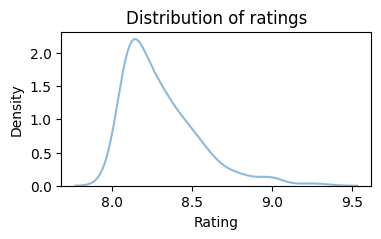

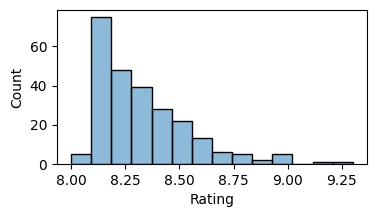

In [ ]:
plt.figure(figsize = (4,2))
sns.kdeplot(data = data, x = 'Rating', alpha = 0.5)
plt.title('Distribution of ratings')
plt.show()
plt.figure(figsize = (4,2))
sns.histplot(data = data, x = 'Rating', alpha = .5)
plt.show()

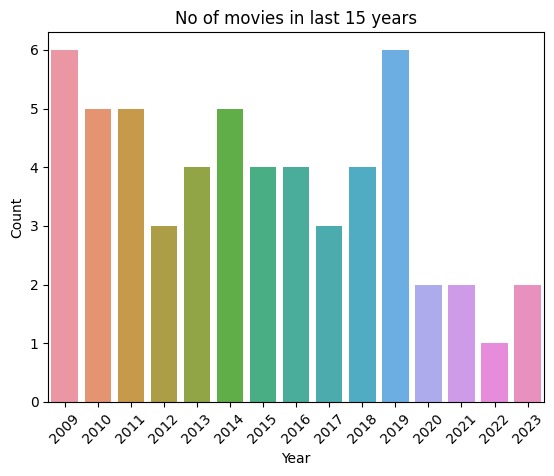

In [ ]:
last_15_yrs = data[data['Year']>2008].sort_values(by='Year', axis=0, ascending=True)
sns.countplot(data=last_15_yrs, x='Year')
plt.title('No of movies in last 15 years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

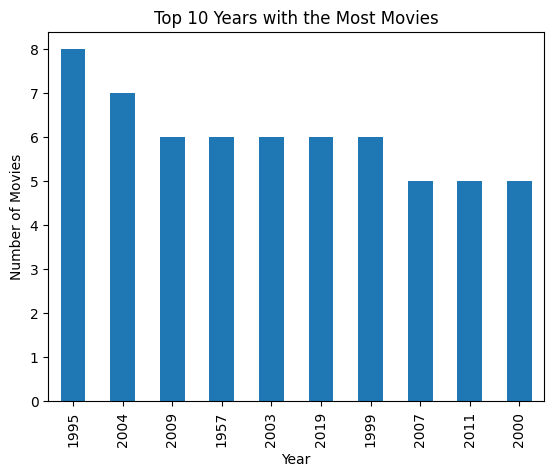

In [ ]:
data['Year'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Years with the Most Movies')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
year_2023 = data[data['Year']>=2019].sort_values(by='Year', axis=0)
year_2023

(13, 5)

In [106]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')


In [108]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/.git/


In [119]:
!git remote add origin 'https://github.com/Bala-Subramanian-G/Web_scrapping.git'

error: remote origin already exists.


In [120]:
!git add 'Web scrapping IMDB (1).ipynb'

In [121]:
!git config --global user.email "balaaganesan@gmail.com"

In [122]:
!git config --global user.name "Bala-Subramanian-G"

In [123]:
!git commit -m "Initial commit"

[master 2dfe3f1] Initial commit
 1 file changed, 1 insertion(+), 1 deletion(-)


In [124]:
!git push origin master

fatal: could not read Username for 'https://github.com': No such device or address
